Clase        Límite inferior Límite superior Marca de clase  Frec. Absoluta  Frec. Relativa  Frec. Acumulada (%)
----------------------------------------------------------------------------------------------------------------
Clase 1      250.0           340.0           295.0           8               0.2667          27.59          
Clase 2      340.0           430.0           385.0           7               0.2333          51.72          
Clase 3      430.0           520.0           475.0           6               0.2             72.41          
Clase 4      520.0           610.0           565.0           4               0.1333          86.21          
Clase 5      610.0           700.0           655.0           1               0.0333          89.66          
Clase 6      700.0           790             745.0           3               0.1             100.0          
----------------------------------------------------------------------------------------------------------------


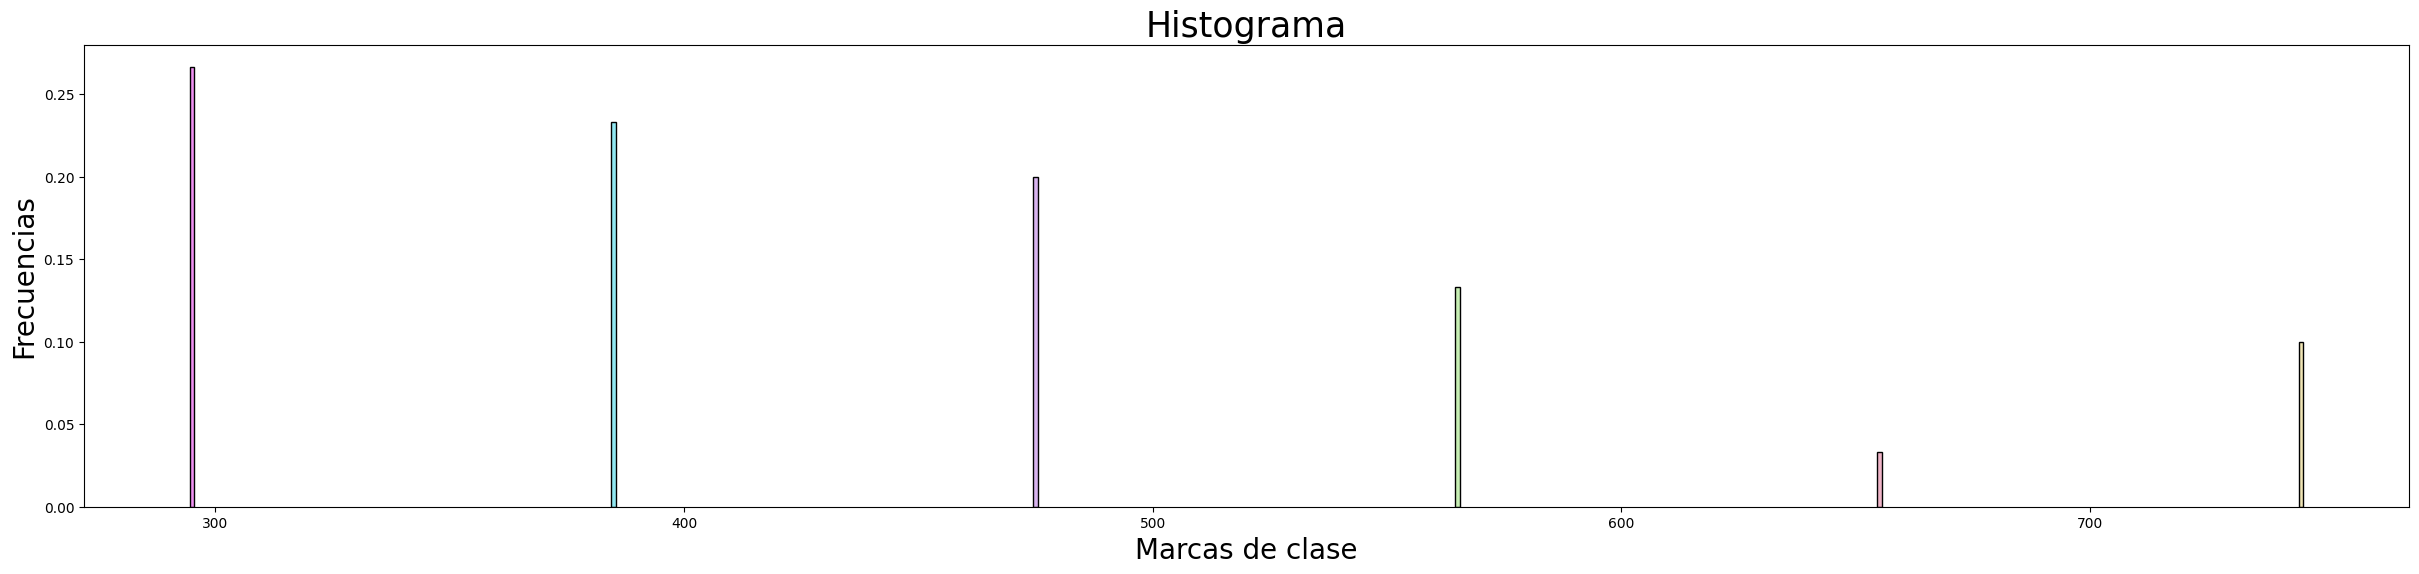

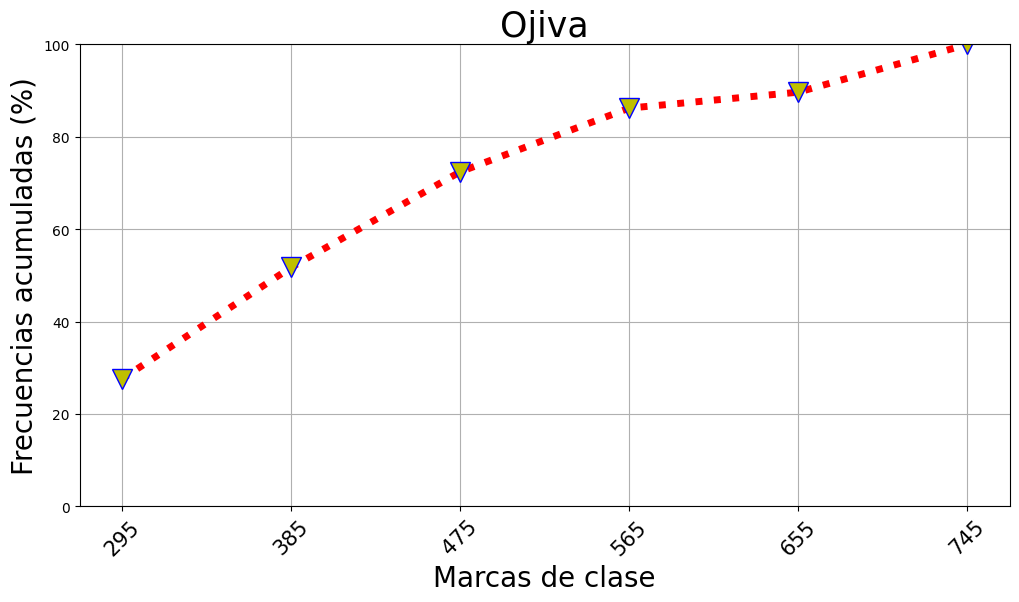

In [33]:
import math
import matplotlib.pyplot as plt

def ordenar_datos(datos):
    return sorted(datos)

def calcular_rango(datos):
    valor_min = min(datos)
    valor_max = max(datos)
    rango = valor_max - valor_min
    return rango, valor_min, valor_max

def calcular_numero_clases(n):  # EN CUANTAS SE DIVIDE
    num_clases = 1 + 3.3 * math.log10(n)
    return math.ceil(num_clases)  # Redondeamos hacia arriba al número entero más cercano

def calcular_ancho_clase(rango, num_clases):
    ancho_clase = rango / num_clases
    return ancho_clase

def calcular_limites_clase(valor_min, ancho_clase, num_clases):
    limites_inferiores = [valor_min + i * ancho_clase for i in range(num_clases)]
    limites_superiores = [lim_inf + ancho_clase for lim_inf in limites_inferiores]
    return limites_inferiores, limites_superiores

def calcular_marcas_clase(limites_inferiores, limites_superiores):
    marcas_clase = [(inf + sup) / 2 for inf, sup in zip(limites_inferiores, limites_superiores)]
    return marcas_clase

def frecuencia_absoluta(datos, limites_inferiores, limites_superiores):
    frec_absoluta = []
    
    for inf, sup in zip(limites_inferiores, limites_superiores):
        contador = sum(1 for dato in datos if inf <= dato < sup)
        frec_absoluta.append(contador)
    
    return frec_absoluta

def frecuencia_relativa(frecuencias, total_datos):
    frec_relativa = [frec / total_datos for frec in frecuencias]
    return frec_relativa

def frecuencia_acumulada(frecuencias):
    total_datos = sum(frecuencias)
    frec_acumulada = [sum(frecuencias[:i+1]) for i in range(len(frecuencias))]
    frec_acumulada_percent = [acum / total_datos * 100 for acum in frec_acumulada]
    return frec_acumulada_percent

def imprimir_tabla(datos_ordenados, limites_inferiores, limites_superiores, marcas_clase, frec_absoluta, frec_relativa, frec_acumulada):
    # Encabezados de la tabla
    print("{:<12} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format("Clase", "Límite inferior", "Límite superior", "Marca de clase", "Frec. Absoluta", "Frec. Relativa", "Frec. Acumulada (%)"))
    print("-" * 112)
    
    # Imprimir cada fila de la tabla
    for i in range(len(limites_inferiores)):
        clase = f"Clase {i+1}"
        lim_inf = round(limites_inferiores[i], 2)
        lim_sup = round(limites_superiores[i], 2)
        marca = round(marcas_clase[i], 2)
        frec_abs = frec_absoluta[i]
        frec_rel = round(frec_relativa[i], 4)
        frec_acum = round(frec_acumulada[i], 2)
        print("{:<12} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(clase, lim_inf, lim_sup, marca, frec_abs, frec_rel, frec_acum))
    
    # Separador entre la tabla de límites y la tabla de frecuencias
    print("-" * 112)
def crear_histograma(marcas_clase, frecuencias):
    plt.figure(figsize=(30, 6))
    plt.bar(marcas_clase, frecuencias,
           width=1, edgecolor="k",
           color=["#EF90F1", "#90E7F1", "#D8B4EF", "#C7EFB4", "#EFB4C7", "#EFE4B4"])
    
    plt.xlabel("Marcas de clase", fontsize=20)
    plt.ylabel("Frecuencias", fontsize=20)
    plt.title("Histograma", fontsize=25)
    plt.show()

def crear_ojiva(marcas_clase, frecuencias):
    frec_acumulada = frecuencia_acumulada(frecuencias)

    plt.figure(figsize=(12, 6))  # Ancho, alto de la figura

    # Trazar la ojiva
    plt.plot(marcas_clase, frec_acumulada, 
             linewidth=5, color="r", linestyle=":", 
             marker="v", markersize=15, markerfacecolor="y", markeredgecolor="b")

    # Configuraciones adicionales del gráfico
    plt.xticks(marcas_clase, fontsize=15, rotation=45)
    plt.xlabel("Marcas de clase", fontsize=20)
    plt.ylabel("Frecuencias acumuladas (%)", fontsize=20)
    plt.title("Ojiva", fontsize=25)
    plt.grid(True)  # Activar la cuadrícula

    # Asegurar que el eje y vaya de 0 a 100
    plt.ylim(0, 100)

    plt.show()  # Mostrar el gráfico





    

# Ejemplo de uso:
datos = [250, 790, 470, 510, 500, 330, 300, 750, 580, 740, 420, 260, 440, 770, 400, 540, 530, 330, 390, 380, 340, 460, 530,
260, 410, 360, 270, 510, 630, 330]

# Paso 1: Ordenar los datos
datos_ordenados = ordenar_datos(datos)

# Paso 2: Calcular el rango
rango, valor_min, valor_max = calcular_rango(datos_ordenados)

# Paso 3: Determinar el número de clases
n = len(datos_ordenados)
num_clases = calcular_numero_clases(n)

# Paso 4: Calcular el ancho de clase
ancho_clase = calcular_ancho_clase(rango, num_clases)

# Paso 5: Calcular límites de clase
limites_inferiores, limites_superiores = calcular_limites_clase(valor_min, ancho_clase, num_clases)
limites_superiores[-1] = valor_max  # Asegurar que el último límite superior sea el máximo valor

# Paso 6: Calcular marcas de clase
marcas_clase = calcular_marcas_clase(limites_inferiores, limites_superiores)

# Paso 7: Calcular frecuencias absolutas
frec_absoluta = frecuencia_absoluta(datos_ordenados, limites_inferiores, limites_superiores)

# Paso 8: Calcular frecuencias relativas
frec_relativa = frecuencia_relativa(frec_absoluta, n)

# Paso 9: Calcular frecuencias acumuladas
frec_acumulada = frecuencia_acumulada(frec_absoluta)

# Imprimir la tabla
imprimir_tabla(datos_ordenados, limites_inferiores, limites_superiores, marcas_clase, frec_absoluta, frec_relativa, frec_acumulada)

# Crear los gráficos
crear_histograma(marcas_clase, frec_relativa)
crear_ojiva(marcas_clase, frec_absoluta)